In [ ]:
# <span style="color:#ff9102">Exploration notebook:</span>

###  <span style="color:#3a0707">For our exploration, we will be basing our work on the visualization of data surrounding the use of palm oil and palm oil derived ingredients in various products.</span>
The questions we will be trying to answer are:  
>+ <span style="color:#194893">In which types (categories) of food products do we most often encounter palm oil in the ingredients?</span>
>+ <span style="color:#194893">Which brands make the most use of palm oil based ingredients in their products?</span>
>+ <span style="color:#194893">Are products containing palm oil as unhealthy as their reputation seems to indicate?</span>
>+ <span style="color:#194893">Is the use of palm oil dominant for certain categories of food products?</span>

In [2]:
# coding: utf-8
%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sbn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from random import sample




In [3]:
# read the csv file
df = pd.read_csv("cleaned_foodfacts.csv", sep='\t',low_memory=False)

In [4]:
# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

(320685, 27)
Index(['code', 'product_name', 'brands', 'brands_tags', 'categories_fr',
       'origins', 'manufacturing_places', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'main_category_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')


## <span style="color:#680a0a">Observing the numerical data in the dataframe:</span>

**This will give us a general idea about the contents of the dataset and orient our exploration.**






In [5]:
df.describe().style


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,248939,248939,248939,261113,243887,229551,243569,244952,200881,259918,255352,255429,221210
mean,1.93602,0.0196594,0.0552465,1141.91,12.7253,5.12592,32.0553,15.9854,2.83247,7.07941,1.5885,0.647145,9.16554
std,2.50202,0.140524,0.269207,6447.15,17.5037,7.91368,29.1407,21.1654,4.58827,8.15655,6.24253,2.65634,9.0559
min,0,0,0,0,0,0,0,0,0,0,0,0,-15
25%,0,0,0,377,0,0,6,1.3,0,0.7,0.0635,0.025,1
50%,1,0,0,1100,5,1.79,20.6,5.71,1.5,4.76,0.58,0.229,10
75%,3,0,0,1674,20,7.14,58.33,24,3.6,10,1.3716,0.541,16
max,31,2,6,3.25137e+06,100,100,100,100,100,100,100,100,40


## <span style="color:#680a0a">Removing products where palm oil is absent or the data is missing:</span>

For this part of the exploration, we will only be interested in products containing palm oil ingredients. We will thereby ignore all products (rows) that don't have data about the use of palm oil or don't contain palm oil as part part of the ingredients (e.g NaN or 0).

In [6]:
df_palmoil=df[df.main_category_fr.notna() & df.ingredients_from_palm_oil_n.notna() & df.ingredients_from_palm_oil_n!=0]
print(df_palmoil.shape)
print(df_palmoil['main_category_fr'].value_counts())


(3887, 27)
Biscuits                                        666
Chocolats                                       296
Snacks sucrés                                   287
Petit-déjeuners                                 238
Gâteaux                                         161
Pains                                           154
Bonbons                                         150
Gaufres                                         118
Cookies                                         115
Produits à tartiner salés                       115
Snacks salés                                    114
Plats préparés                                  106
Pâtes à tartiner                                101
Glaces                                           89
Epicerie                                         88
Soupes                                           86
Pâtisseries                                      76
Tartes                                           67
Pâtes à tarte                                    65
A

## <span style="color:#680a0a">We will now take a look at the categories the products containing palm oil we are left with belong to.</span>

**Our hypothesis is that heavily processed foods, snacks and candy will be the most represented products in our dataset.**

In [10]:
print(df_palmoil['main_category_fr'].value_counts())
for x in df_palmoil['main_category_fr'].unique():
    if df_palmoil['main_category_fr'].value_counts()[x]<17:
        df_palmoil['main_category_fr'].replace(to_replace=x,value='Autres',inplace=True)

Biscuits                                        666
Chocolats                                       296
Snacks sucrés                                   287
Petit-déjeuners                                 238
Gâteaux                                         161
Pains                                           154
Bonbons                                         150
Gaufres                                         118
Cookies                                         115
Produits à tartiner salés                       115
Snacks salés                                    114
Plats préparés                                  106
Pâtes à tartiner                                101
Glaces                                           89
Epicerie                                         88
Soupes                                           86
Pâtisseries                                      76
Tartes                                           67
Pâtes à tarte                                    65
Aliments et 

Text(0.5,1,'Number of Products Containing Palm Oil by Category')

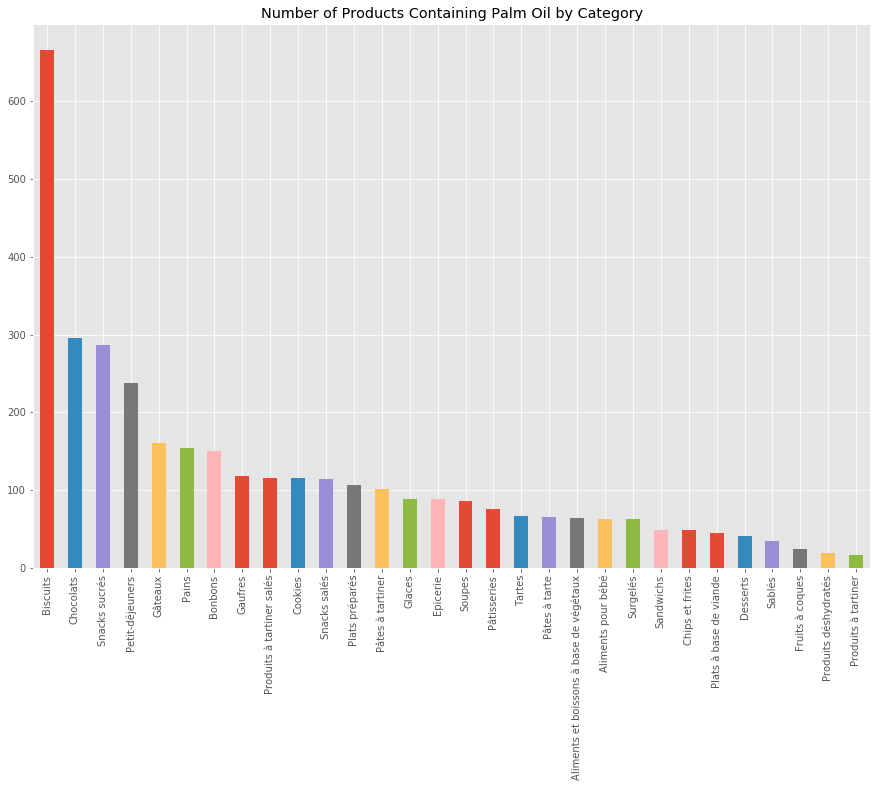

In [11]:
matplotlib.style.use('ggplot')
df_cats=df_palmoil[df_palmoil['main_category_fr']!='Autres']
df_cats['main_category_fr'].value_counts().plot.bar(figsize=(15,10))
plt.ylabel('')
plt.title("Number of Products Containing Palm Oil by Category" )

## <span style="color:#680a0a">Which brands make the most use of palm oil based ingredients in their products?</span>

In [12]:
print(df_palmoil['brands'].value_counts().head(30))

Carrefour                   163
Leader Price                 99
Auchan                       76
U                            66
Nestlé                       63
Cora                         52
LU                           47
Lindt                        42
Milka                        38
Migros                       35
Dia                          34
Netto                        33
Kinder,Ferrero               32
Knorr                        31
Casino                       30
Chabrior                     29
Lotus                        28
Sondey                       27
Herta                        27
P'tit déli,Marque Repère     26
Winny                        26
Kinder                       25
Kellogg's                    24
Cémoi                        24
Lu                           23
Gerblé                       23
Mars                         22
St Hubert                    20
Jordans                      19
Côte d'Or                    18
Name: brands, dtype: int64


### <span style="color:#680a0a">We remove the rows with no information about the brand, and update brands to only keep the main ones using palm oil ingredients</span>

In [13]:
df_palmoil=df_palmoil[df_palmoil.brands.notna()]
for x in df_palmoil['brands'].unique():
    if df_palmoil['brands'].value_counts()[x]<20:
        df_palmoil['brands'].replace(to_replace=x,value='Autres Marques',inplace=True)

In [14]:
df_palmoil_topbrands=df_palmoil[df_palmoil['brands']!='Autres Marques']

Text(0.5,0,'Brand Name')

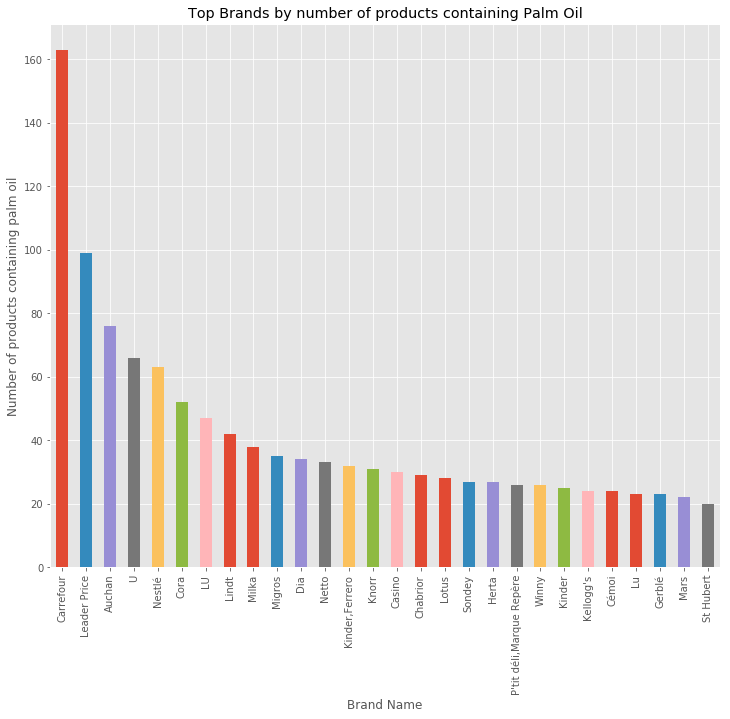

In [15]:

df_palmoil_topbrands['brands'].value_counts().plot.bar(figsize=(12,10))
plt.title("Top Brands by number of products containing Palm Oil" )
plt.ylabel("Number of products containing palm oil")
plt.xlabel('Brand Name')

## <span style="color:#680a0a">Are products containing Palm Oil _"unhealthy"_ ? </span>
#### We will try answering this question by looking at the French _"Nutrition Grades"_ and British _"Nutrition Scores"_ of the products:

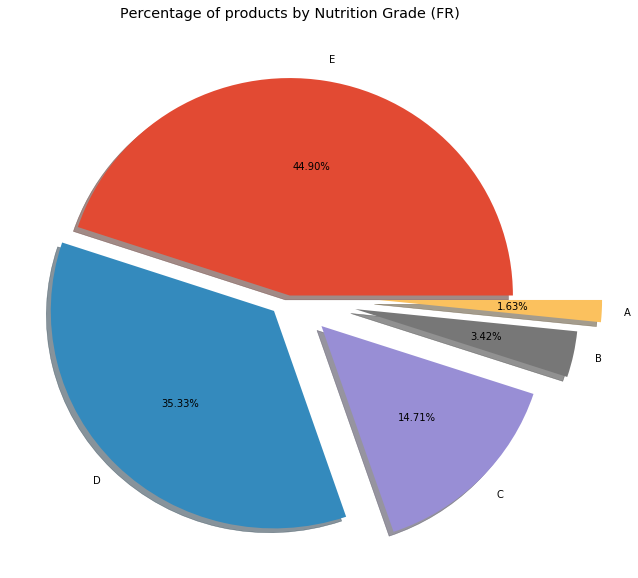

In [16]:
fig, ax = plt.subplots()
labels= 'E','D','C','B','A'
explode = (0, 0.1, 0.2, 0.3, 0.4)
df_palmoil['nutrition_grade_fr'].value_counts().plot(ax=ax, kind='pie',figsize=(10, 10),labels=labels,autopct='%1.2f%%',shadow=True,explode=explode)
plt.title("Percentage of products by Nutrition Grade (FR)" )
ax.set_ylabel("")
plt.show()

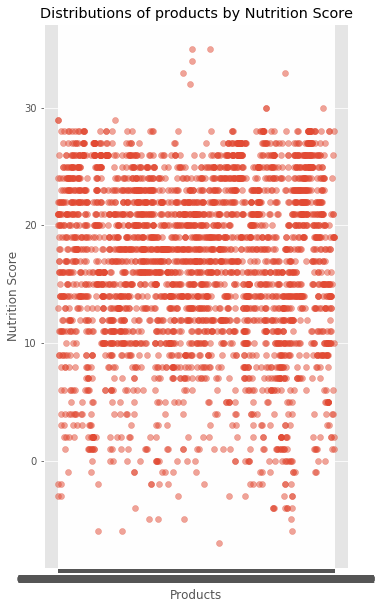

In [17]:

x=df_palmoil['code']
y=df_palmoil['nutrition-score-fr_100g']
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(121)
plt.scatter(x, y, alpha=0.5)

plt.title("Distributions of products by Nutrition Score")
ax.set_ylabel("Nutrition Score")
ax.set_xlabel("Products")
plt.show()


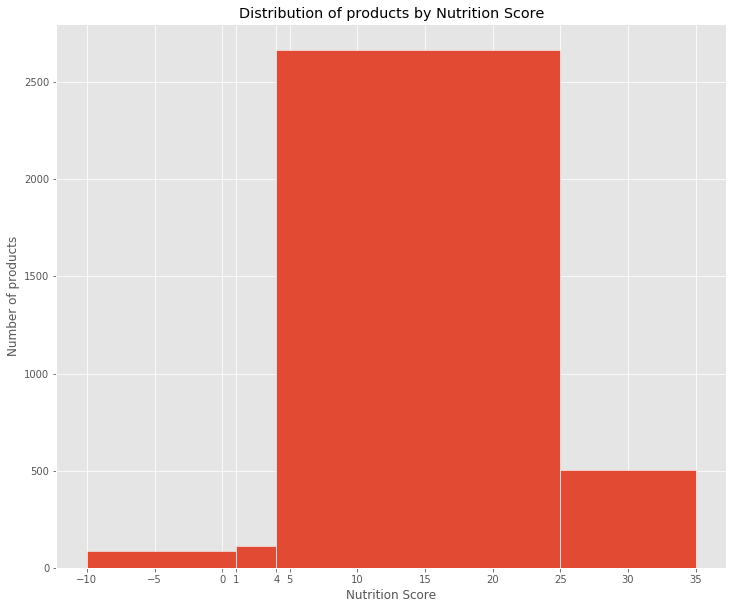

In [61]:
df_palmoil.hist('nutrition-score-fr_100g',figsize=(12,10),bins=[-10,1,4,25,35],edgecolor='white')
xticks=np.append(np.arange(-10, 36, 5),[1,4])
plt.title("Distribution of products by Nutrition Score")
plt.ylabel('Number of products')
plt.xlabel("Nutrition Score")
plt.xticks(xticks)



plt.show()

### Is the use of palm oil in the main categories we have found it in predominant in the food industry?

In [57]:
top_categories=df_palmoil['main_category_fr'].value_counts().drop('Autres')[0:14].index.tolist()
df_nopalmoil=df[df.main_category_fr.notna() & df.ingredients_from_palm_oil_n.notna() & df.ingredients_from_palm_oil_n==0]

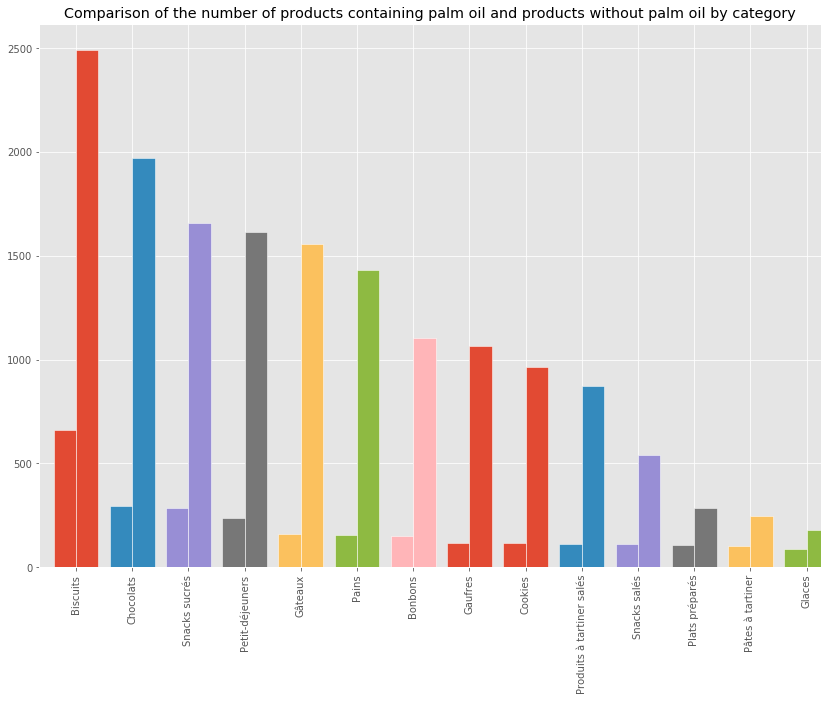

In [60]:

fig=plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111) # Create matplotlib axes
df_nopalmoil.loc[df_nopalmoil['main_category_fr'].isin(top_categories)]['main_category_fr'].value_counts().plot(kind='bar', ax=ax1,width=0.4, position=0,edgecolor='white')
df_palmoil.loc[df_palmoil['main_category_fr'].isin(top_categories)]['main_category_fr'].value_counts().plot(kind='bar', ax=ax1,width=0.4, position=1,edgecolor='white')
plt.title("Comparison of the number of products containing palm oil and products without palm oil by category")
plt.show()